# Cleaning and Preprocessing Data for AI ML

In [15]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Step 1: Read the dataset into a Pandas Dataframe

brain = pd.read_csv("resources/brain_categorical.csv")
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [17]:
# Step 2: Identify your X and y

X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


### Categorical Data

Machine Learning Algorithms are based on math. In other words, its inputs rely on numerical data. For categorical data, we have to convert strings into meaningful numbers.  

Some methods include <strong>Integer</strong>, <strong>One-Hot</strong>, and <strong>Binary Encoding</strong>.  

Sklearn provides a preprocessing library for the methods mentioned above.  

<strong>Pandas</strong> also includes an action called <strong>get_dummies</strong> that is useful to get binary encoded data from a DataFrame.

### Dummy Encoding (Binary Encoded Data)

<strong>Dummy Encoding</strong> transforms each categorical feature into new columns with binary code. 1 == True and 0 == False. In other words, it marks a value as 1 if that label is present in the original row.

In [18]:
# Note how the data previously can have "gender" labeled as male or female

# copy the data
data = X.copy()

# Use get dummies to binary encode the categorical label of male or female
data_encoded = pd.get_dummies(data, columns=["gender"])
data_encoded.head()

# Now the dataset displays 1 as males and 2 as females

,age,size,gender_Female,gender_Male
0,20-46,4512,0,1
1,20-46,3738,0,1
2,20-46,4261,0,1
3,20-46,3777,0,1
4,20-46,4177,0,1


In [19]:
# We can run get_dummies on multiple columns

data = X.copy()
data_encoded = pd.get_dummies(data)
data_encoded.head()


# Notices how all string-related labels are converted to binary

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


### Scaling and Normalization

After encoding the data (assuming it has categorical data), we need to normalize/scale the dataset. This method is usually only required with models that use gradient descent because Linear Regression models tend to not show a difference. Normalizing the data allows the algorithms to converge on a local optimum

Sklearn offers a variety of scaling and normalization options. THe two most common are <strong>MinMax</strong> and <strong>Standard Scaler</strong>. Standard Scaler us best used when you don't know anything about your data. 

In [20]:
# Lets see how scaling and normalization works

# Step 1: import train_test_split
from sklearn.model_selection import train_test_split

In [21]:
# Step 2: use get_dummies to encode the categorical data

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


### StandardScaler

We initiate StandardScaler by fitting (training) a StandardScaler model to our data. This StandardScaler model can also be used on future data.  

Note that we must use fit/transform approach to isolate the testing data from the training data used to fit the model. This removes bias from the model against the testing data. 

In [22]:
# Step 3: import the StandardScaler dependency
from sklearn.preprocessing import StandardScaler

In [23]:
# Step 4: FIT the StandardScaler model. One for X_train and another for y_train

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
# Step 5: TRANSFORM the model to remove bias between trained model and testing data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies Guassian distribution where the mean is 0 and the standard deviation is 1. Obeserve the plot below:

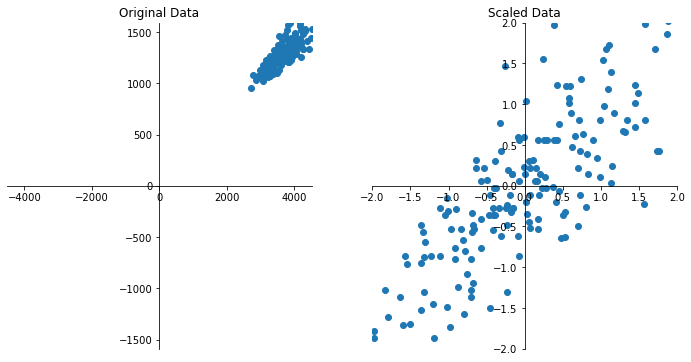

In [25]:
# Create a figure consisting of two subplots, one for original data and another using StandardScaler data.
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Set the titles of each sub plot
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Create the limits for each subplot
maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)
axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

# Function to set the aces and ticks of each subplot
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# Call the function
set_axes(axes1)
set_axes(axes2)

# Plot the subplots using scatter
axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Now lets put it all together to see a hollistic view of Data Preprocessing

In [26]:
# Step 1: Convert the categorical data into numbers using Binary Coding

X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1,1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


In [27]:
# Step 2: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Step 3: Scale and normalize your data. StandardScaler is best practice if you dont know anything about the data.

from sklearn.preprocessing import StandardScaler

# Run the StandardScaler function on training data while fitting
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Then transform the fit training data and the test data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)